In [6]:
pip install streamlit opencv-python mediapipe pillow tensorflow


  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl (39.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\diego\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\diego\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import cv2
import mediapipe as mp
import numpy as np
from PIL import Image, ImageTk
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import tkinter as tk
from tkinter import filedialog, Label, Button, Frame

# ---------------------- Configuraciones iniciales ----------------------
model = load_model("modelo_ejercicios.h5")

clases = [
    'barbell biceps curl', 'bench press', 'chest fly machine', 'deadlift',
    'decline bench press', 'hammer curl', 'hip thrust', 'incline bench press',
    'lat pulldown', 'lateral raises', 'leg extension', 'leg raises', 'plank',
    'pull up', 'push up', 'romanian deadlift', 'russian twist', 'shoulder press',
    'squat', 't bar row', 'tricep dips', 'tricep pushdown'
]

mp_pose = mp.solutions.pose
pose_model = mp_pose.Pose(static_image_mode=True)
pose_landmark = mp_pose.PoseLandmark

# ---------------------- Evaluación de postura ----------------------
def evaluar_postura_por_ejercicio(ejercicio, landmarks):
    if not landmarks:
        return "No se detectaron puntos"

    get = lambda lm: landmarks.landmark[lm]
    altura = lambda lm: get(lm).y
    diff = lambda a, b: abs(altura(a) - altura(b))

    ejercicio = ejercicio.lower()

    if ejercicio == "squat":
        return "✔️ Squat bien hecho" if altura(pose_landmark.RIGHT_KNEE) > altura(pose_landmark.RIGHT_HIP) else "❌ Squat incompleto"
    elif ejercicio == "push up":
        return "✔️ Push-up bien hecho" if altura(pose_landmark.RIGHT_ELBOW) > altura(pose_landmark.RIGHT_SHOULDER) else "❌ Push-up incompleto"
    elif ejercicio == "plank":
        if diff(pose_landmark.RIGHT_SHOULDER, pose_landmark.RIGHT_HIP) < 0.05 and \
           diff(pose_landmark.RIGHT_HIP, pose_landmark.RIGHT_ANKLE) < 0.05:
            return "✔️ Plank alineado"
        else:
            return "❌ Plank desalineado"
    else:
        return "ℹ️ Sin reglas definidas para este ejercicio"

# ---------------------- Procesamiento principal ----------------------
def detectar_ejercicio_y_postura(ruta_img):
    img = image.load_img(ruta_img, target_size=(128, 128))
    x = np.expand_dims(np.array(img)/255.0, axis=0)
    pred = model.predict(x)
    clase_index = np.argmax(pred)
    ejercicio = clases[clase_index]
    confianza = float(np.max(pred))

    img_cv = cv2.imread(ruta_img)
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    results = pose_model.process(img_rgb)
    feedback = evaluar_postura_por_ejercicio(ejercicio, results.pose_landmarks)

    return ejercicio, confianza, feedback

# ---------------------- Interfaz Gráfica (Tkinter con estilo) ----------------------
def cargar_imagen():
    file_path = filedialog.askopenfilename(filetypes=[("Imágenes", "*.jpg *.png *.jpeg")])
    if file_path:
        ejercicio, confianza, feedback = detectar_ejercicio_y_postura(file_path)

        img_pil = Image.open(file_path).resize((300, 300))
        img_tk = ImageTk.PhotoImage(img_pil)
        imagen_label.config(image=img_tk)
        imagen_label.image = img_tk

        resultado_label.config(
            text=f"🏋️‍♂️ Ejercicio: {ejercicio}\n📊 Confianza: {confianza:.2f}\n📏 {feedback}",
            bg="#ffffff"
        )

# ---------------------- Ventana Principal ----------------------
ventana = tk.Tk()
ventana.title("🧠 Detector de Ejercicios y Postura")
ventana.geometry("480x600")
ventana.configure(bg="#e3f2fd")

# Estilo global
fuente_titulo = ("Helvetica", 18, "bold")
fuente_texto = ("Helvetica", 12)
color_acento = "#2196f3"
color_fondo = "#e3f2fd"
color_boton = "#1976d2"
color_texto = "#0d47a1"

# Título
titulo = Label(
    ventana, text="Evaluador de Ejercicios",
    font=fuente_titulo, bg=color_fondo, fg=color_texto
)
titulo.pack(pady=20)

# Botón
boton_cargar = Button(
    ventana, text="📂 Cargar Imagen", command=cargar_imagen,
    font=fuente_texto, bg=color_boton, fg="white", activebackground="#1565c0",
    padx=20, pady=10, relief="raised", bd=3
)
boton_cargar.pack(pady=10)

# Marco de la imagen
imagen_frame = Frame(ventana, bg="white", bd=2, relief="groove")
imagen_frame.pack(pady=15)
imagen_label = Label(imagen_frame, bg="white")
imagen_label.pack()

# Resultado
resultado_label = Label(
    ventana, text="", font=fuente_texto, bg="#ffffff", fg="#000000",
    wraplength=440, justify="center", bd=2, relief="groove", padx=10, pady=10
)
resultado_label.pack(pady=20)

ventana.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


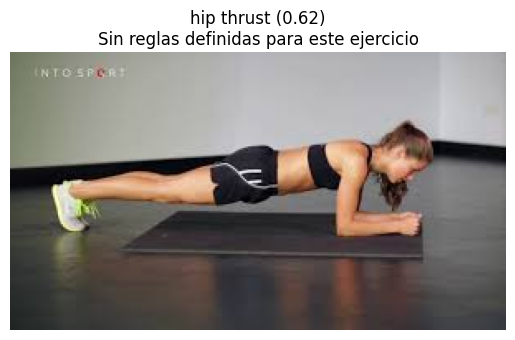

Ejercicio detectado: hip thrust
Evaluación de postura: Sin reglas definidas para este ejercicio


In [5]:
ruta = "C:/Users/diego/OneDrive/Desktop/descarga.jpg"
ejercicio, feedback = detectar_ejercicio_y_postura(ruta)
print(f"Ejercicio detectado: {ejercicio}")
print(f"Evaluación de postura: {feedback}")